In [67]:
#importing necessary libraries
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import optuna
import xgboost as xgb
import plotly.graph_objects as go

In [68]:
#pip install xgboost

In [69]:
#pip install optuna

In [70]:
# load the dataset
df = pd.read_csv('faults.csv')

# Basic Understanding of data

In [72]:
#to know how big dataset is
df.shape

(1941, 34)

In [73]:
# to know how data looks like
df.sample(10)

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
1457        599        608    2382642    2382651            54           12   
755        1217       1225    1413272    1413276            12            9   
1136        818        829     657566     657580           112           13   
1568       1288       1302    1388373    1388398           159           25   
1649        408        416     945792     945807            81           11   
693          39        214    2886302    2886367          6182          295   
590         100        175     909876     909953          1923          227   
1760         79         86    2887095    2887114            86           17   
833        1421       1448    5921344    5921348            81           28   
464          39        192    1554895    1555056         13185          572   

      Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
1457            9               6100                    101   
755             4               1509                    112   
1136           14              12587                     86   
1568           29              18514                    105   
1649           15               9462                    107   
693           138             635475                     42   
590           139             241083                    116   
1760           19               9690                    102   
833             9              10329                    113   
464           370            1529932                     30   

      Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
1457                    126  ...             0.0000           -0.1175   
755                     143  ...            -0.5000           -0.0176   
1136                    133  ...             0.2143           -0.1220   
1568                    128  ...             0.4400           -0.0903   
1649                    125  ...             0.4667           -0.0874   
693                     124  ...            -0.6286           -0.1969   
590                     140  ...             0.0260           -0.0206   
1760                    123  ...             0.6316           -0.1197   
833                     141  ...            -0.8518           -0.0038   
464                     141  ...             0.0497           -0.0935   

      SigmoidOfAreas  Pastry  Z_Scratch  K_Scatch  Stains  Dirtiness  Bumps  \
1457          0.1862       0          0         0       0          0      0   
755           0.1417       0          0         0       1          0      0   
1136          0.2712       0          0         0       0          0      1   
1568          0.5789       0          0         0       0          0      0   
1649          0.2288       0          0         0       0          0      0   
693           1.0000       0          0         1       0          0      0   
590           1.0000       0          0         1       0          0      0   
1760          0.2445       0          0         0       0          0      0   
833           0.2150       0          0         0       0          1      0   
464           1.0000       0          0         1       0          0      0   

      Other_Faults  
1457             1  
755              0  
1136             0  
1568             1  
1649             1  
693              0  
590              0  
1760             1  
833              0  
464              0  

[10 rows x 34 columns]

In [74]:
df.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [75]:
# here the last 7 columns represent fault classes so i will convert the 7 columns into a single one and remove the unnecessary columns.
# Check if any row has multiple fault labels
target_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

def check_multilabel(df, target_columns):
    multilabel_rows = df[target_columns].sum(axis=1) > 1
    if multilabel_rows.any():
        print("This is a multi-label classification problem.")
        print(f"Total multi-label rows: {multilabel_rows.sum()}")
    else:
        print("This is a multi-class classification problem.")
        
check_multilabel(df,target_columns)


This is a multi-class classification problem.


In [76]:
#converting into single column
df['Fault_type'] = df[target_columns].idxmax(axis = 1)
df=df.drop(target_columns, axis=1)

df.sample(10)

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
1478        385        399    4138007    4138019           125           17   
845         624        635    2014210    2014317           477           82   
1625        138        151    1733458    1733471           102           15   
1593       1269       1290     340471     340499           230           41   
1001        814        823     119924     119932            52           10   
148         268        279   12917033   12917094           444           43   
1601       1111       1130    2527319    2527390           747           62   
852         621        632    2086004    2086116           733           75   
970         920        928    1862719    1862728            52            9   
395           0        436     407936     408170         24365         1084   

      Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
1478           13              14167                     83   
845           107              53536                     96   
1625           13              10855                     95   
1593           42              20570                     82   
1001            8               4695                     74   
148            61              45269                     78   
1601           72              76627                     85   
852           112              81625                     98   
970             9               5816                    101   
395           680            2935414                     22   

      Maximum_of_Luminosity  ...  Edges_X_Index  Edges_Y_Index  \
1478                    141  ...         0.8235         0.9231   
845                     132  ...         0.1341         1.0000   
1625                    118  ...         0.8667         1.0000   
1593                    101  ...         0.5122         0.6667   
1001                    103  ...         0.9000         1.0000   
148                     126  ...         0.2558         1.0000   
1601                    127  ...         0.3065         0.9861   
852                     127  ...         0.1467         1.0000   
970                     126  ...         0.8889         1.0000   
395                     143  ...         0.4022         0.3441   

      Outside_Global_Index  LogOfAreas  Log_X_Index  Log_Y_Index  \
1478                   0.0      2.0969       1.1461       1.0792   
845                    1.0      2.6785       1.0414       2.0294   
1625                   0.5      2.0086       1.1139       1.1139   
1593                   1.0      2.3617       1.3222       1.4472   
1001                   0.0      1.7160       0.9542       0.9031   
148                    1.0      2.6474       1.0414       1.7853   
1601                   1.0      2.8733       1.2787       1.8513   
852                    1.0      2.8651       1.0414       2.0492   
970                    1.0      1.7160       0.9031       0.9542   
395                    0.0      4.3868       2.6395       2.3692   

      Orientation_Index  Luminosity_Index  SigmoidOfAreas    Fault_type  
1478            -0.1429           -0.1146          0.2901  Other_Faults  
845              0.8972           -0.1232          0.9971     Dirtiness  
1625             0.0000           -0.1686          0.2914  Other_Faults  
1593             0.2500           -0.3013          0.8705  Other_Faults  
1001            -0.1111           -0.2946          0.1773         Bumps  
148              0.8197           -0.2035          0.9212        Pastry  
1601             0.7324           -0.1986          0.9991  Other_Faults  
852              0.9018           -0.1300          0.9980     Dirtiness  
970              0.1111           -0.1262          0.1773         Bumps  
395             -0.4633           -0.0588          1.0000      K_Scatch  

[10 rows x 28 columns]

In [77]:
# to know datatype of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1941 non-null   int64  
 1   X_Maximum              1941 non-null   int64  
 2   Y_Minimum              1941 non-null   int64  
 3   Y_Maximum              1941 non-null   int64  
 4   Pixels_Areas           1941 non-null   int64  
 5   X_Perimeter            1941 non-null   int64  
 6   Y_Perimeter            1941 non-null   int64  
 7   Sum_of_Luminosity      1941 non-null   int64  
 8   Minimum_of_Luminosity  1941 non-null   int64  
 9   Maximum_of_Luminosity  1941 non-null   int64  
 10  Length_of_Conveyer     1941 non-null   int64  
 11  TypeOfSteel_A300       1941 non-null   int64  
 12  TypeOfSteel_A400       1941 non-null   int64  
 13  Steel_Plate_Thickness  1941 non-null   int64  
 14  Edges_Index            1941 non-null   float64
 15  Empt

In [78]:
# to check missing values
df.isnull().sum()
# here there is no missing values

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Fault_type               0
dtype: int64

In [79]:
# to know how data looks mathematically
df.describe()

X_Minimum    X_Maximum     Y_Minimum     Y_Maximum   Pixels_Areas  \
count  1941.000000  1941.000000  1.941000e+03  1.941000e+03    1941.000000   
mean    571.136012   617.964451  1.650685e+06  1.650739e+06    1893.878413   
std     520.690671   497.627410  1.774578e+06  1.774590e+06    5168.459560   
min       0.000000     4.000000  6.712000e+03  6.724000e+03       2.000000   
25%      51.000000   192.000000  4.712530e+05  4.712810e+05      84.000000   
50%     435.000000   467.000000  1.204128e+06  1.204136e+06     174.000000   
75%    1053.000000  1072.000000  2.183073e+06  2.183084e+06     822.000000   
max    1705.000000  1713.000000  1.298766e+07  1.298769e+07  152655.000000   

        X_Perimeter   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
count   1941.000000   1941.000000       1.941000e+03            1941.000000   
mean     111.855229     82.965997       2.063121e+05              84.548686   
std      301.209187    426.482879       5.122936e+05              32.134276   
min        2.000000      1.000000       2.500000e+02               0.000000   
25%       15.000000     13.000000       9.522000e+03              63.000000   
50%       26.000000     25.000000       1.920200e+04              90.000000   
75%       84.000000     83.000000       8.301100e+04             106.000000   
max    10449.000000  18152.000000       1.159141e+07             203.000000   

       Maximum_of_Luminosity  ...  Outside_X_Index  Edges_X_Index  \
count            1941.000000  ...      1941.000000    1941.000000   
mean              130.193715  ...         0.033361       0.610529   
std                18.690992  ...         0.058961       0.243277   
min                37.000000  ...         0.001500       0.014400   
25%               124.000000  ...         0.006600       0.411800   
50%               127.000000  ...         0.010100       0.636400   
75%               140.000000  ...         0.023500       0.800000   
max               253.000000  ...         0.875900       1.000000   

       Edges_Y_Index  Outside_Global_Index   LogOfAreas  Log_X_Index  \
count    1941.000000           1941.000000  1941.000000  1941.000000   
mean        0.813472              0.575734     2.492388     1.335686   
std         0.234274              0.482352     0.788930     0.481612   
min         0.048400              0.000000     0.301000     0.301000   
25%         0.596800              0.000000     1.924300     1.000000   
50%         0.947400              1.000000     2.240600     1.176100   
75%         1.000000              1.000000     2.914900     1.518500   
max         1.000000              1.000000     5.183700     3.074100   

       Log_Y_Index  Orientation_Index  Luminosity_Index  SigmoidOfAreas  
count  1941.000000        1941.000000       1941.000000     1941.000000  
mean      1.403271           0.083288         -0.131305        0.585420  
std       0.454345           0.500868          0.148767        0.339452  
min       0.000000          -0.991000         -0.998900        0.119000  
25%       1.079200          -0.333300         -0.195000        0.248200  
50%       1.322200           0.095200         -0.133000        0.506300  
75%       1.732400           0.511600         -0.066600        0.999800  
max       4.258700           0.991700          0.642100        1.000000  

[8 rows x 27 columns]

In [80]:
# to know duplicate values
df.duplicated().sum()

0

# EDA

In [82]:
df['Fault_type'].value_counts()

Fault_type
Other_Faults    673
Bumps           402
K_Scatch        391
Z_Scratch       190
Pastry          158
Stains           72
Dirtiness        55
Name: count, dtype: int64

In [83]:
df.nunique()

X_Minimum                 962
X_Maximum                 994
Y_Minimum                1939
Y_Maximum                1940
Pixels_Areas              920
X_Perimeter               399
Y_Perimeter               317
Sum_of_Luminosity        1909
Minimum_of_Luminosity     161
Maximum_of_Luminosity     100
Length_of_Conveyer         84
TypeOfSteel_A300            2
TypeOfSteel_A400            2
Steel_Plate_Thickness      24
Edges_Index              1387
Empty_Index              1338
Square_Index              770
Outside_X_Index           454
Edges_X_Index             818
Edges_Y_Index             648
Outside_Global_Index        3
LogOfAreas                914
Log_X_Index               183
Log_Y_Index               217
Orientation_Index         918
Luminosity_Index         1522
SigmoidOfAreas            388
Fault_type                  7
dtype: int64

In [84]:
df['TypeOfSteel_A300'].unique()

array([1, 0], dtype=int64)

In [85]:
df['TypeOfSteel_A400'].unique()

array([0, 1], dtype=int64)

In [86]:
df['Outside_Global_Index'].unique()

array([1. , 0.5, 0. ])

In [87]:
# Rename multiple columns
df.rename(columns={'TypeOfSteel_A300': 'A300', 'TypeOfSteel_A400': 'A400'}, inplace=True)

#converting the 2 type of steel column into a single one
type_of_steel = ['A300','A400']
df['Steel_type'] = df[type_of_steel].idxmax(axis = 1)
df=df.drop(type_of_steel, axis=1)

In [88]:
df.sample(5)

X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
1515       1325       1340    9767941    9767962           229           25   
1702        114        134     115356     115418           532           75   
523          89        151    2584705    2584775          1909          175   
1916        767        788     566837     566850            83           28   
221         157        167    1009876    1009888            67           15   

      Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
1515           23              25182                    101   
1702           73              54451                     94   
523           125             245067                    120   
1916           20              10345                    115   
221            13               8477                    113   

      Maximum_of_Luminosity  ...  Edges_Y_Index  Outside_Global_Index  \
1515                    127  ...         0.9130                   1.0   
1702                    111  ...         0.8493                   1.0   
523                     140  ...         0.5600                   1.0   
1916                    141  ...         0.6500                   0.0   
221                     140  ...         0.9231                   1.0   

      LogOfAreas  Log_X_Index  Log_Y_Index  Orientation_Index  \
1515      2.3598       1.1761       1.3222             0.2857   
1702      2.7259       1.3010       1.7924             0.6774   
523       3.2808       1.7924       1.8451             0.1143   
1916      1.9191       1.3222       1.1139            -0.3810   
221       1.8261       1.0000       1.0792             0.1667   

      Luminosity_Index  SigmoidOfAreas    Fault_type  Steel_type  
1515           -0.1409          0.5212  Other_Faults        A400  
1702           -0.2004          0.9981  Other_Faults        A400  
523             0.0029          1.0000      K_Scatch        A400  
1916           -0.0263          0.4514  Other_Faults        A400  
221            -0.0115          0.2288     Z_Scratch        A300  

[5 rows x 27 columns]

In [89]:
df['Steel_type'].value_counts()

Steel_type
A400    1164
A300     777
Name: count, dtype: int64

Number of outliers detected: 97


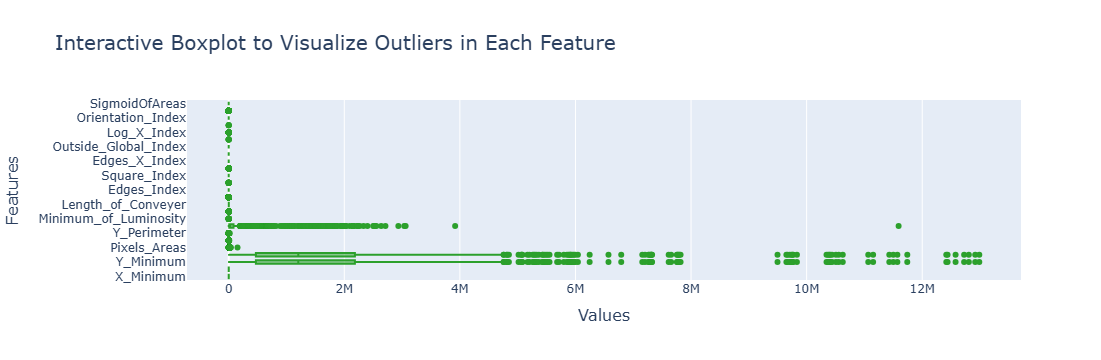

In [90]:
# Outliers
from sklearn.ensemble import IsolationForest

# Drop categorical columns and ensure data is numerical
categorical_col = ['Fault_type', 'Steel_type']
dfn = df.drop(columns=categorical_col)

# Instantiate Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Set contamination rate (e.g., 5% of data assumed to be outliers)

# Fit the model and predict
outlier_predictions = iso_forest.fit_predict(dfn)

# IsolationForest returns:
#  1 for inliers
# -1 for outliers
df['Outlier'] = outlier_predictions

# Count and display outliers
num_outliers = (df['Outlier'] == -1).sum()
print(f"Number of outliers detected: {num_outliers}")

# Filter outliers and inliers
outliers = df[df['Outlier'] == -1]
inliers = df[df['Outlier'] == 1]

# visualizing outlier
fig = px.box(
    dfn,
    orientation="h",  # Horizontal orientation to match the original visualization
    title="Interactive Boxplot to Visualize Outliers in Each Feature",
    template="plotly",  # Default Plotly theme
    color_discrete_sequence=["#2ca02c"],  # Set a custom color
)
fig.update_layout(
    title_font=dict(size=20),
    xaxis_title="Values",
    yaxis_title="Features",
    xaxis=dict(showgrid=True, title_font=dict(size=16)),
    yaxis=dict(showgrid=False, title_font=dict(size=16)),
)
# Display the plot
fig.show()


# removing outliers
dfc = df[df['Outlier'] == 1]


In [91]:
dfc['Outlier'].unique()

array([1])

In [92]:
dfc = dfc.drop(columns=['Outlier'])

# visualization


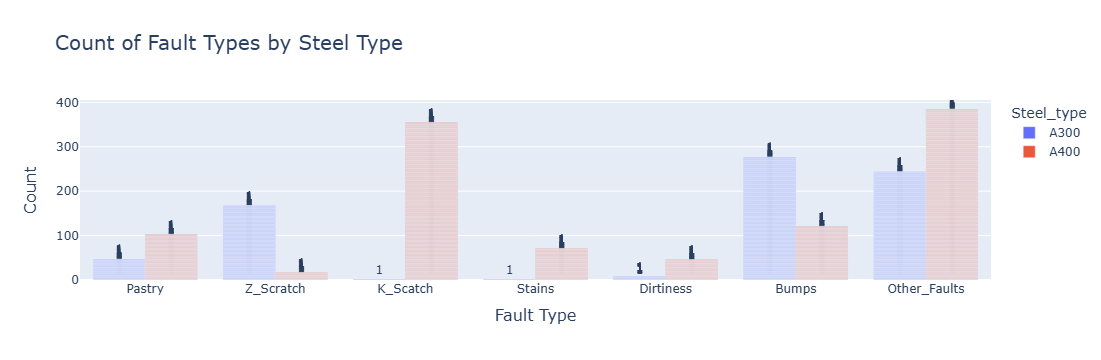

In [94]:
import plotly.express as px

# Create an interactive count plot for multiple categorical columns
fig = px.bar(
    dfc,
    x="Fault_type",  # First categorical column
    color="Steel_type",  # Second categorical column for coloring
    title="Count of Fault Types by Steel Type",
    text_auto=True,  # Display counts on the bars
    template="plotly",  # Default theme
    barmode="group"  # Group bars for each Fault_type by Steel_type
)

# Update layout for better presentation
fig.update_layout(
    title_font=dict(size=20),
    xaxis_title="Fault Type",
    yaxis_title="Count",
    xaxis=dict(title_font=dict(size=16)),
    yaxis=dict(title_font=dict(size=16)),
)

# Display the plot
fig.show()


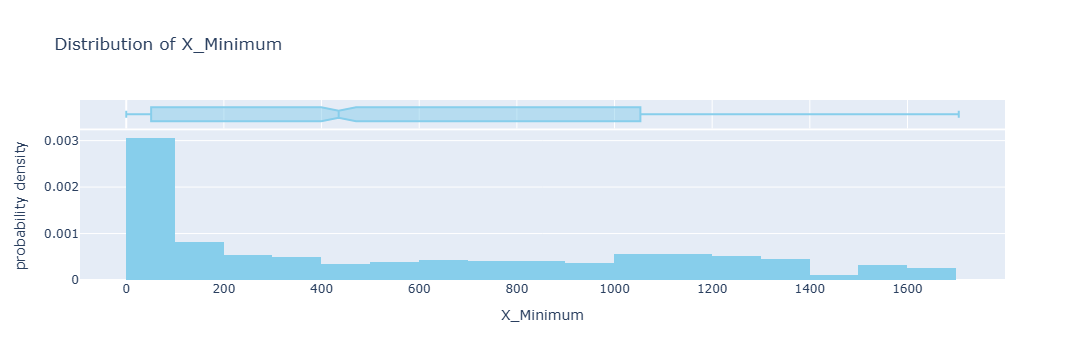

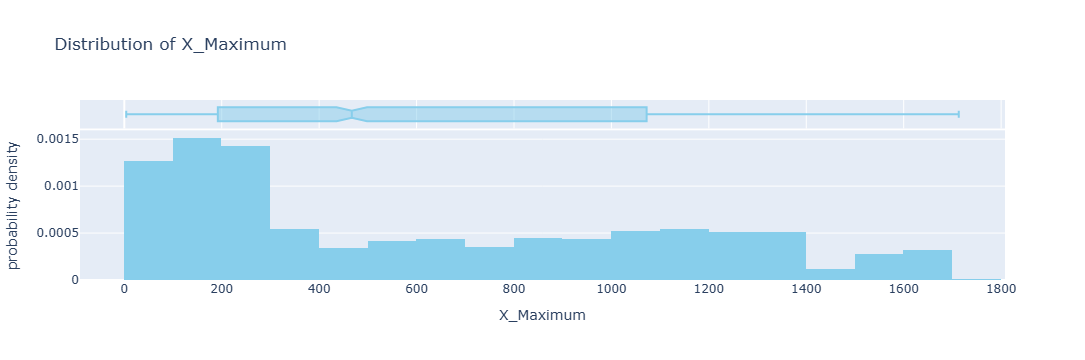

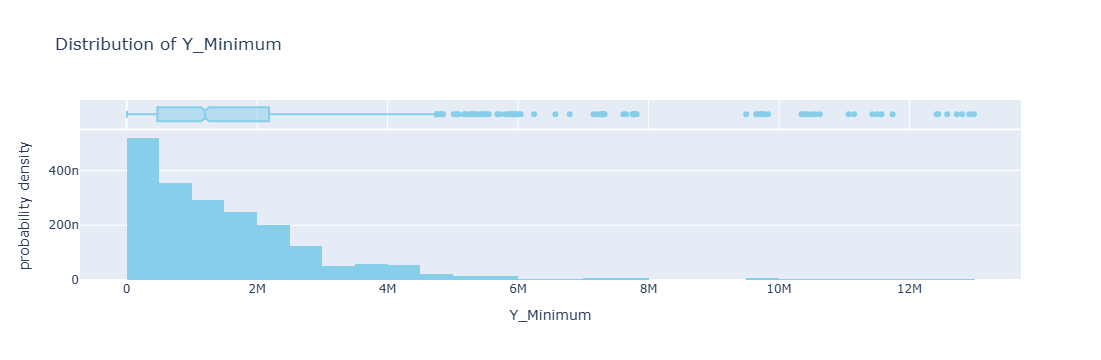

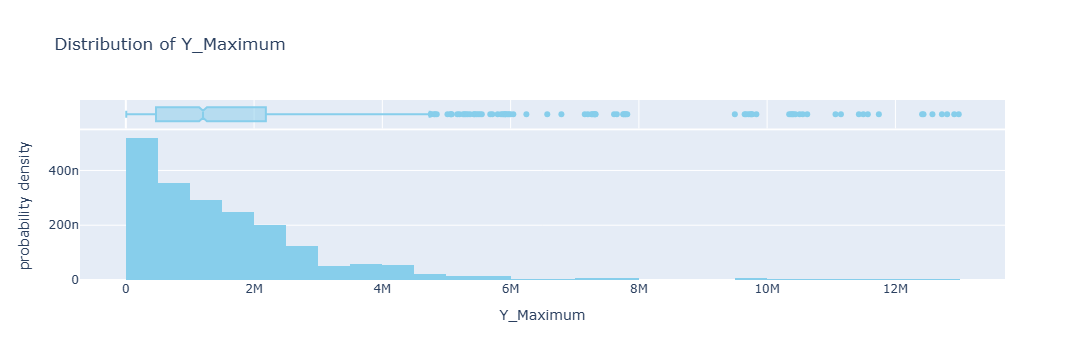

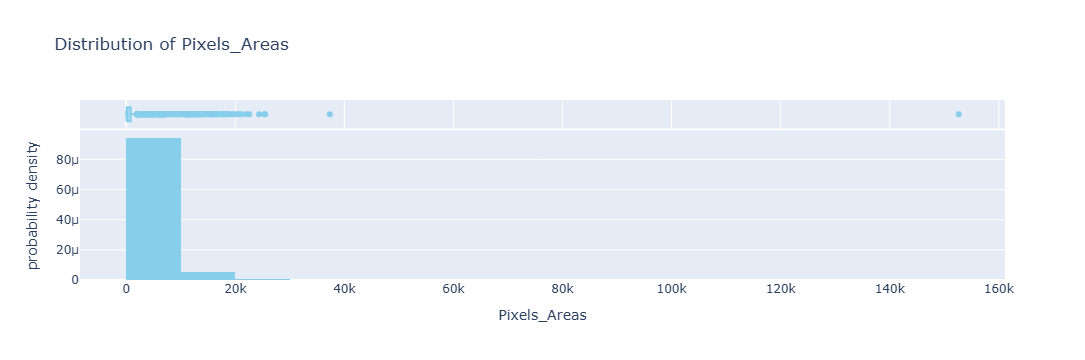

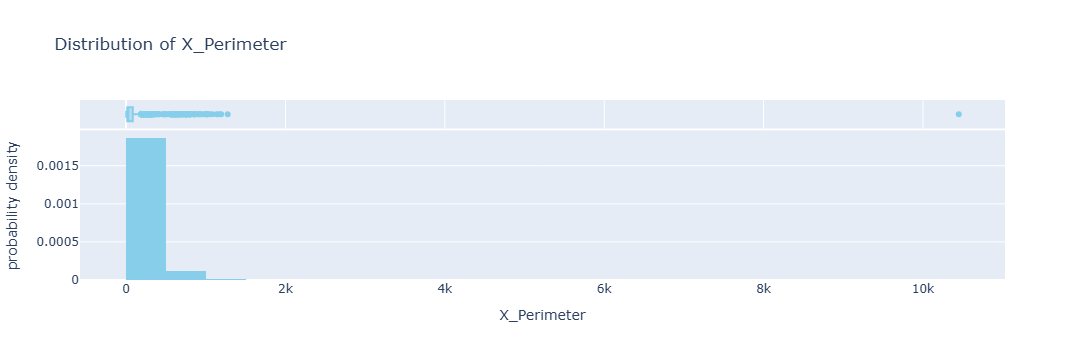

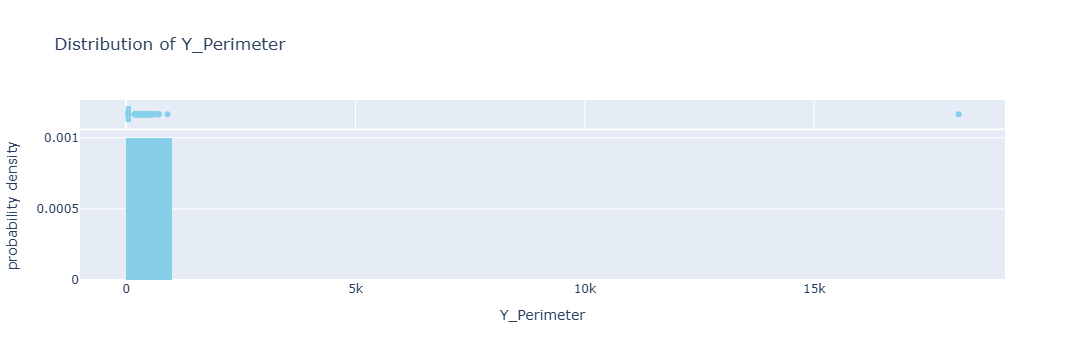

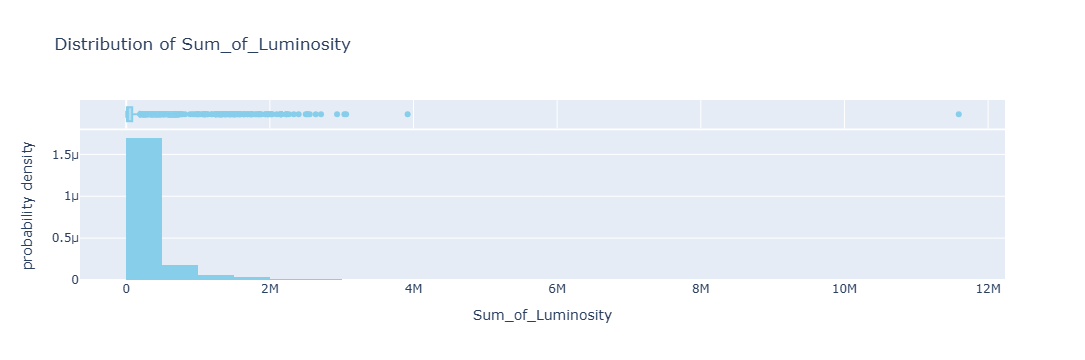

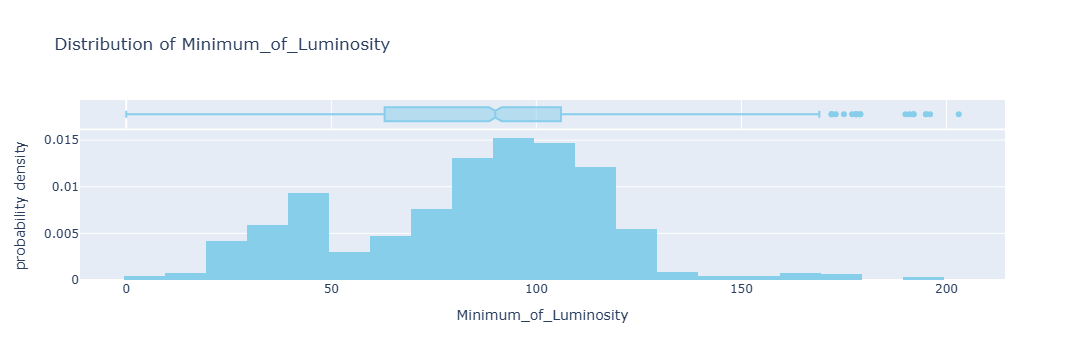

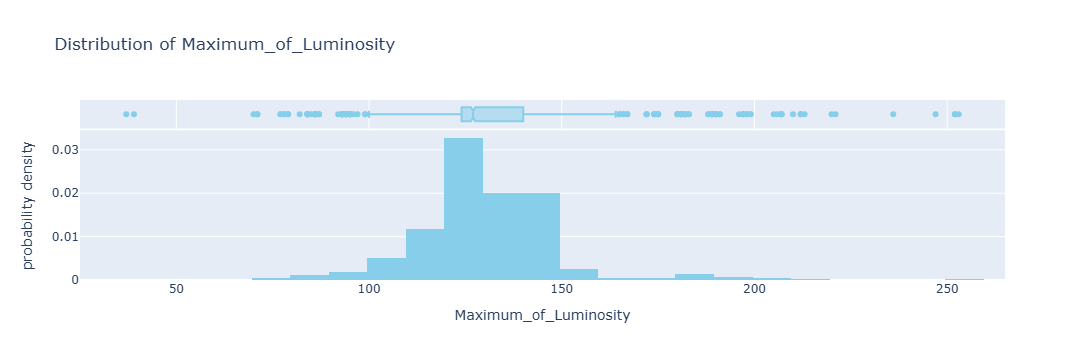

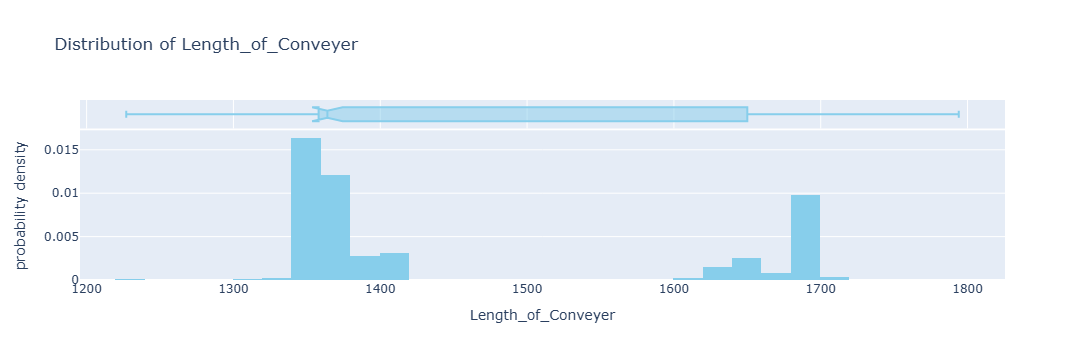

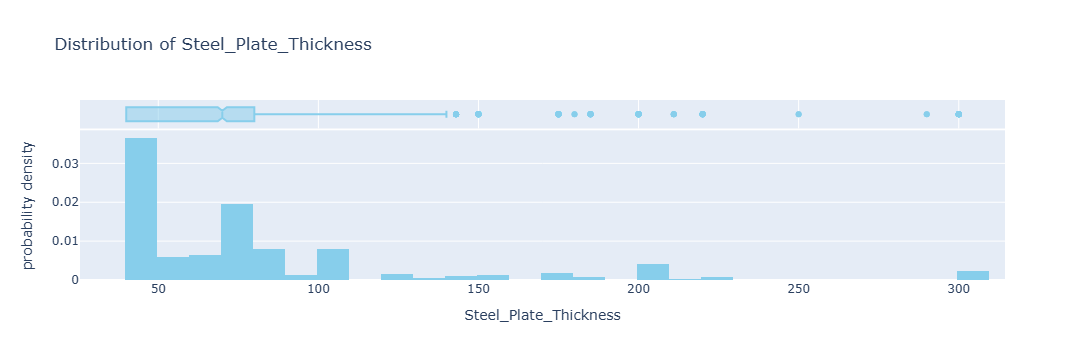

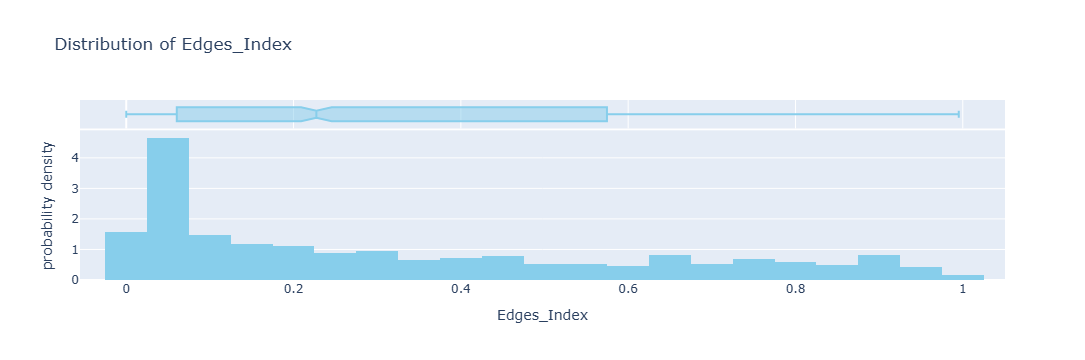

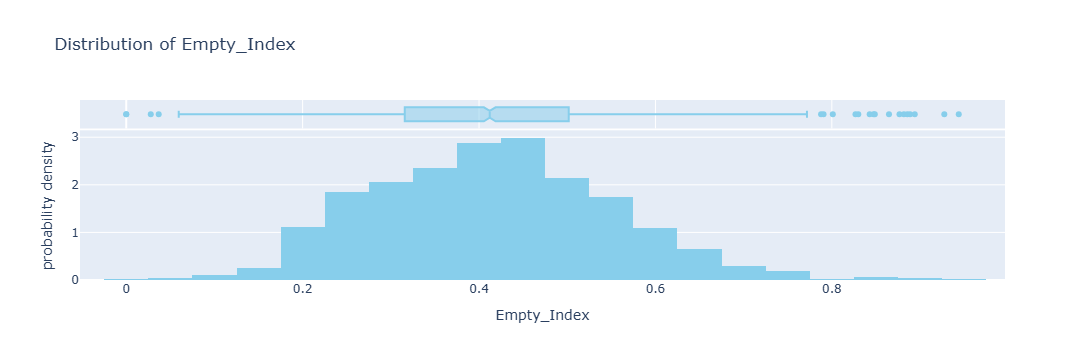

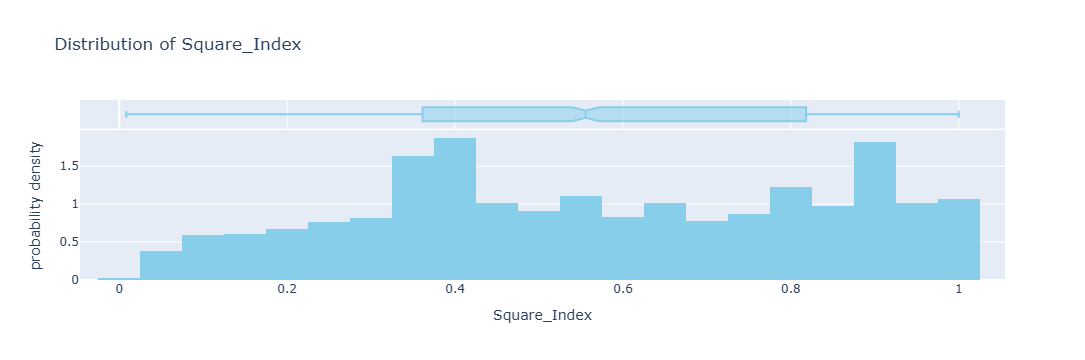

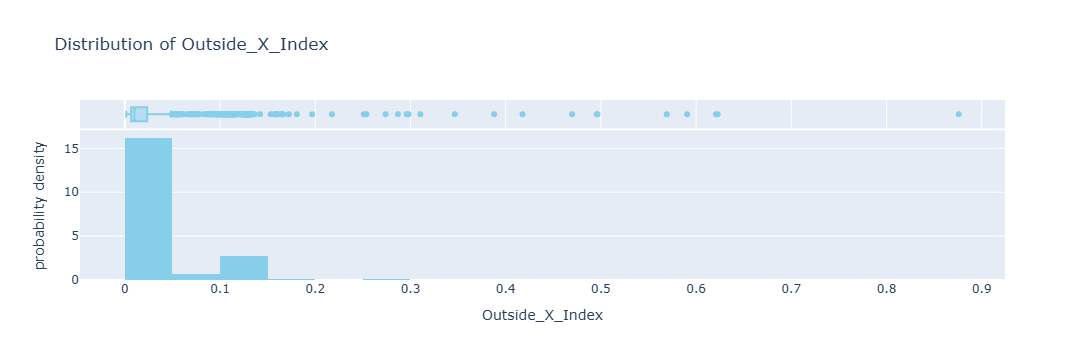

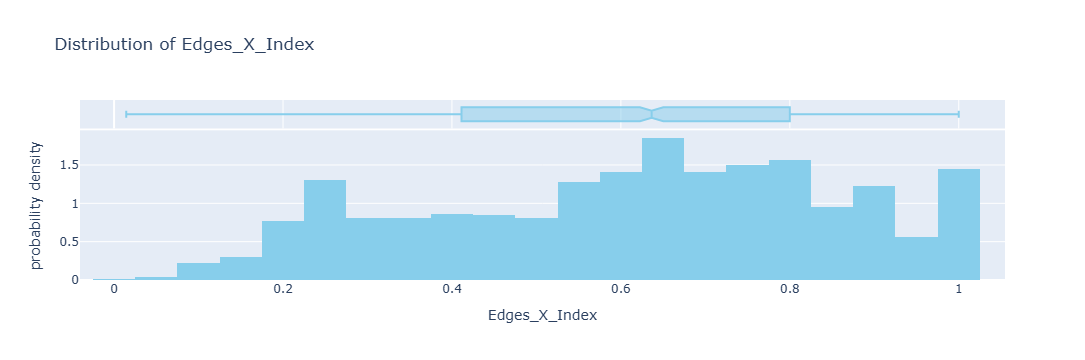

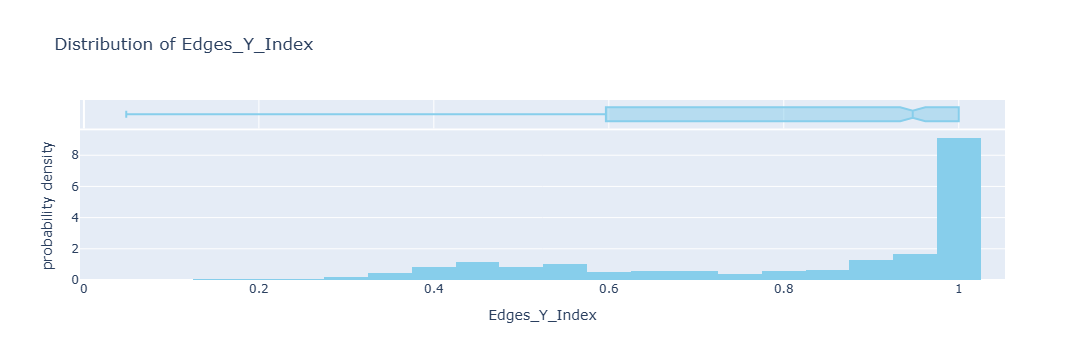

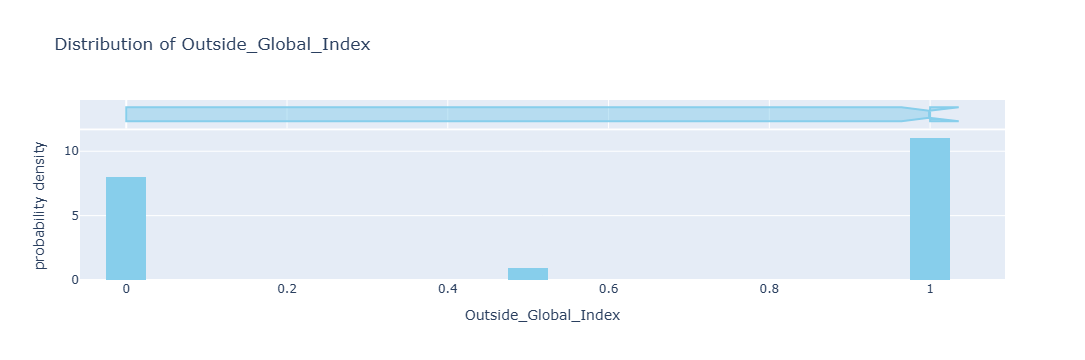

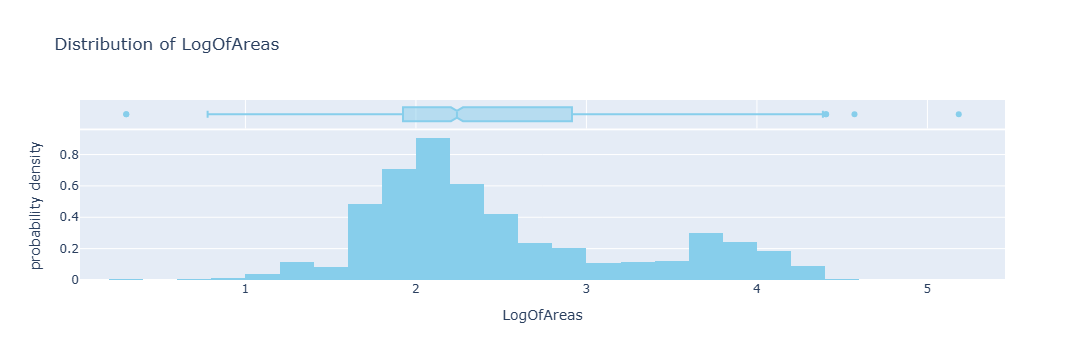

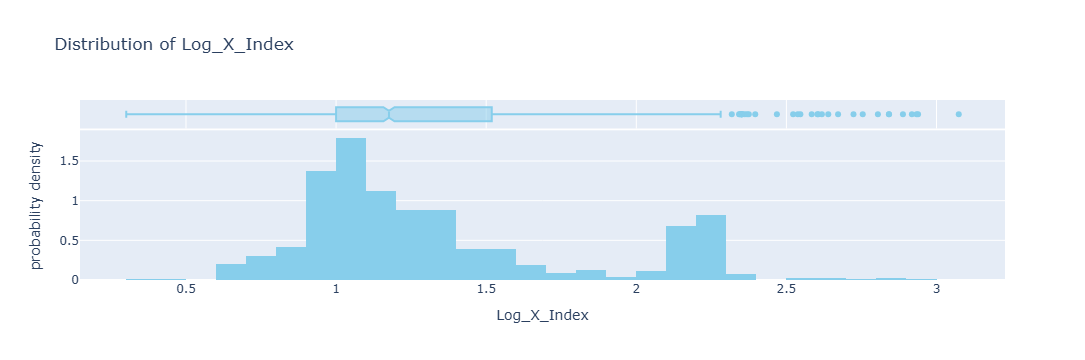

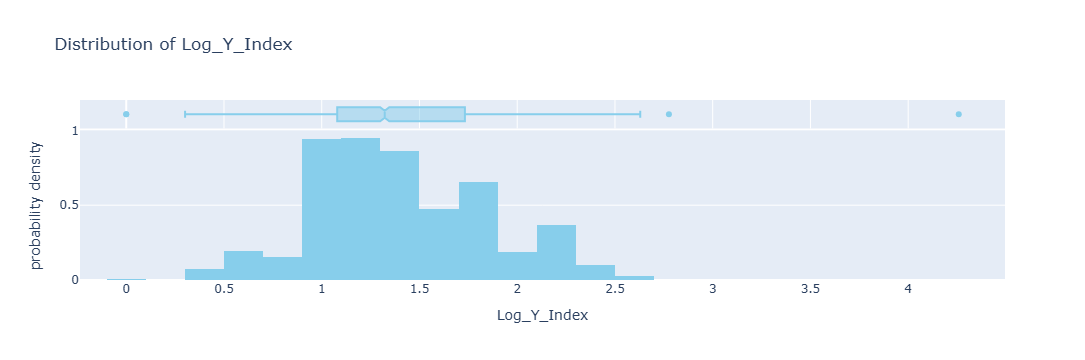

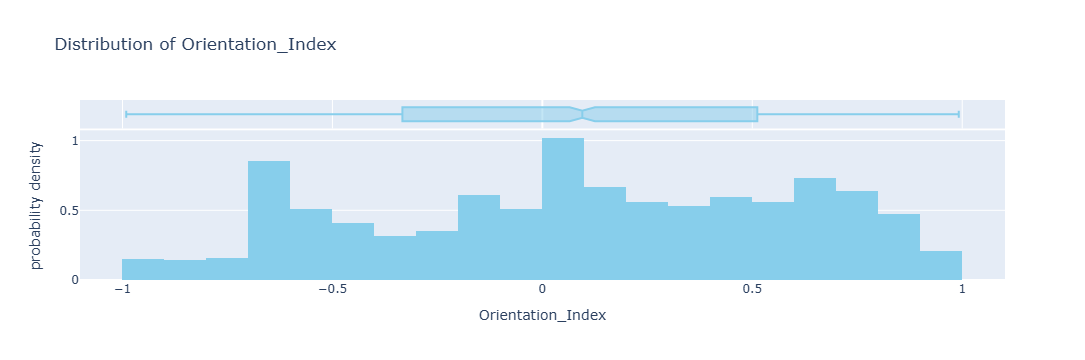

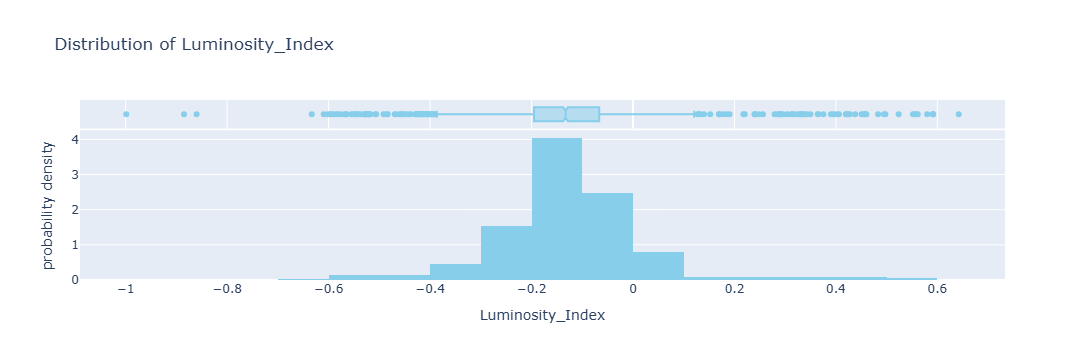

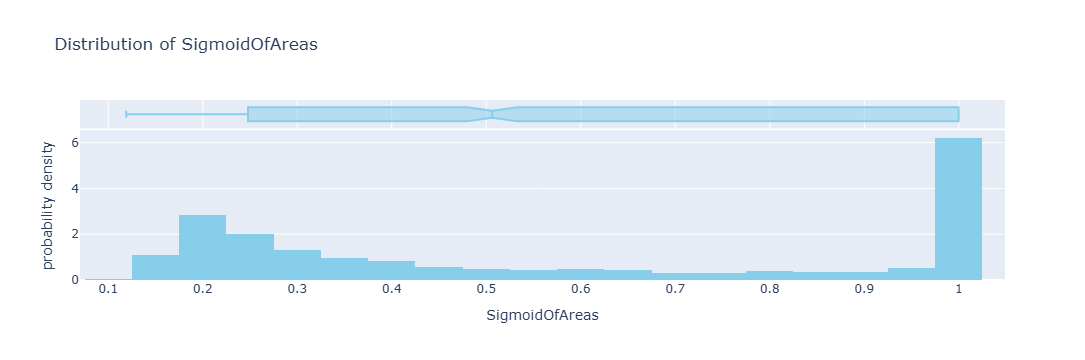

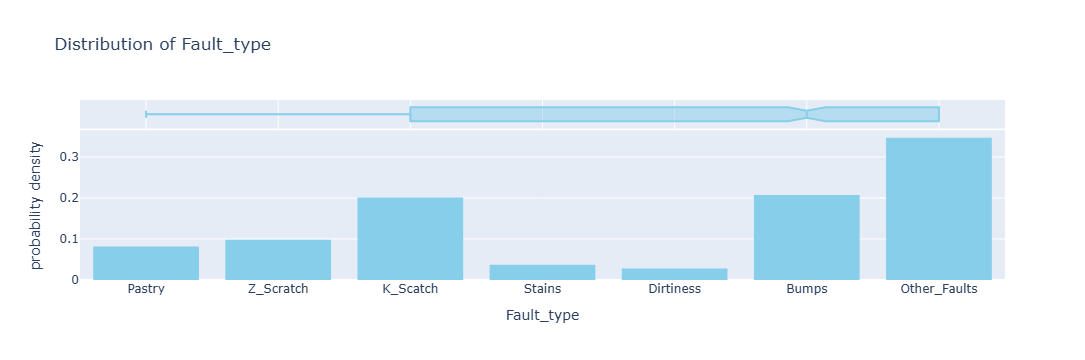

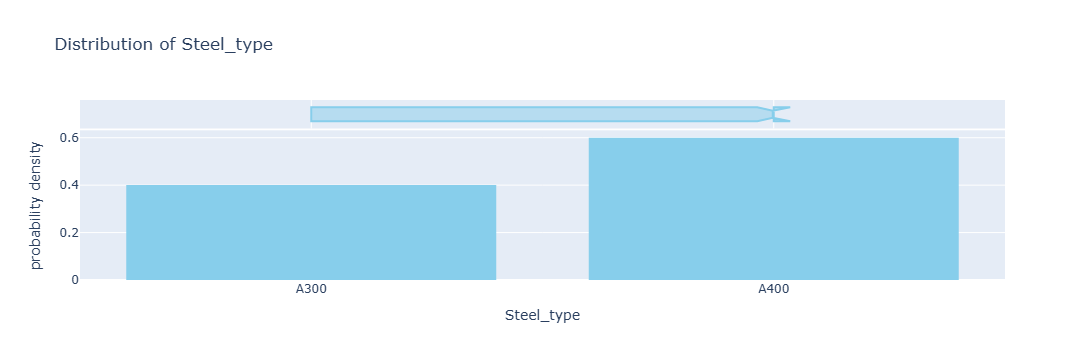

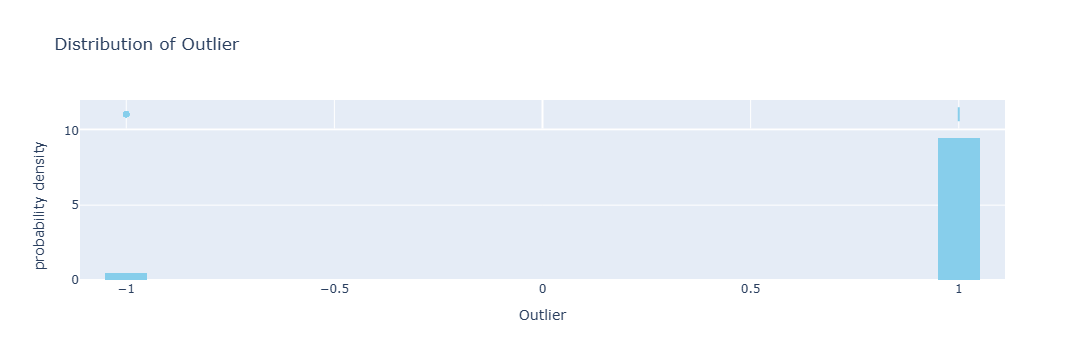

In [95]:
categorical_col = ['Fault_type','Steel_type']
dfcn = dfc.drop(columns =categorical_col)

for column in df.columns:
    # Create a histogram for each feature with KDE (Kernel Density Estimate) overlay
    fig = px.histogram(
        df,
        x=column,
        title=f"Distribution of {column}",
        nbins=30,  
        marginal="box", 
        color_discrete_sequence=["skyblue"],  
        histnorm="probability density" 
    )
    
    # Show the plot
    fig.show()


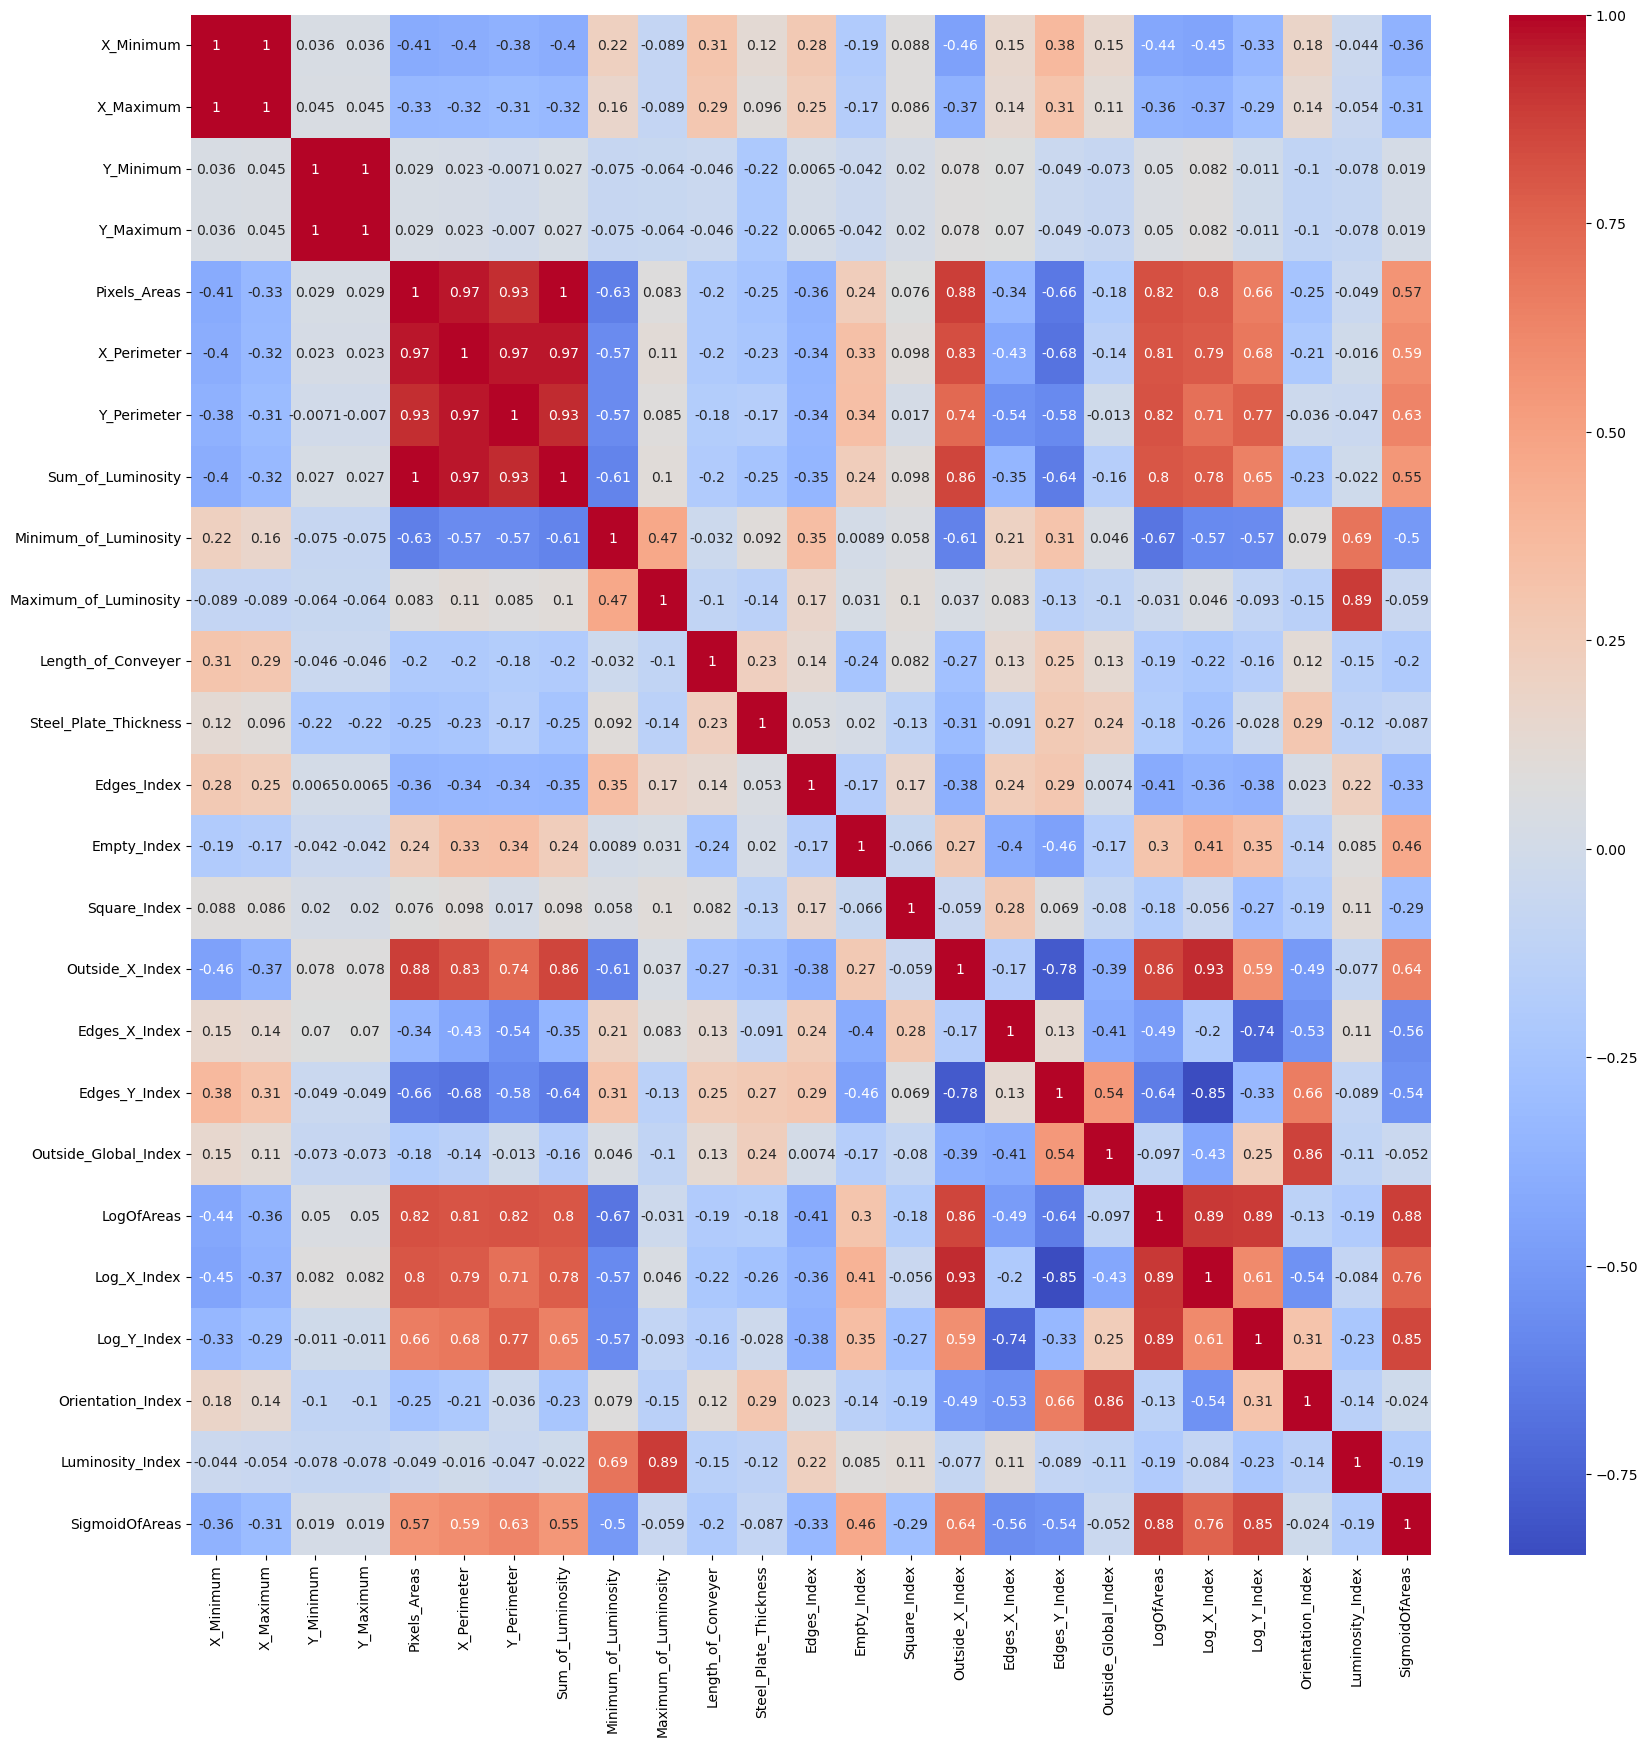

Strongly correlated feature pairs:
            Feature1           Feature2  Correlation
0          X_Minimum          X_Maximum     0.995388
47         Y_Minimum          Y_Maximum     1.000000
90      Pixels_Areas        X_Perimeter     0.966208
91      Pixels_Areas        Y_Perimeter     0.925685
92      Pixels_Areas  Sum_of_Luminosity     0.997201
110      X_Perimeter        Y_Perimeter     0.965907
111      X_Perimeter  Sum_of_Luminosity     0.970188
129      Y_Perimeter  Sum_of_Luminosity     0.931856
259  Outside_X_Index        Log_X_Index     0.933029


In [96]:
#correlation matrix
corr_matrix = dfcn.corr()
plt.figure(figsize=(20, 20))
sn.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

threshold = 0.9
# Create a mask to ignore the upper triangle and self-correlations
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)

# Extract the pairs that meet the correlation threshold
strong_corr_pairs = corr_matrix.where(mask).stack().reset_index()

# Rename columns for clarity
strong_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']

# Filter pairs based on the threshold
strong_corr_pairs = strong_corr_pairs[(strong_corr_pairs['Correlation'] > threshold) | (strong_corr_pairs['Correlation'] < -threshold)]

# Display strong correlation pairs
print("Strongly correlated feature pairs:")
print(strong_corr_pairs)


In [103]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1844 entries, 0 to 1940
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   X_Minimum              1844 non-null   int64  
 1   X_Maximum              1844 non-null   int64  
 2   Y_Minimum              1844 non-null   int64  
 3   Y_Maximum              1844 non-null   int64  
 4   Pixels_Areas           1844 non-null   int64  
 5   X_Perimeter            1844 non-null   int64  
 6   Y_Perimeter            1844 non-null   int64  
 7   Sum_of_Luminosity      1844 non-null   int64  
 8   Minimum_of_Luminosity  1844 non-null   int64  
 9   Maximum_of_Luminosity  1844 non-null   int64  
 10  Length_of_Conveyer     1844 non-null   int64  
 11  Steel_Plate_Thickness  1844 non-null   int64  
 12  Edges_Index            1844 non-null   float64
 13  Empty_Index            1844 non-null   float64
 14  Square_Index           1844 non-null   float64
 15  Outside_X

In [105]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()
dfc['Fault_type'] = le.fit_transform(dfc['Fault_type'])

#Check the mapping
print("Fault_type classes:", dict(zip(le.classes_, le.transform(le.classes_))))

dfc['Steel_type'] = le.fit_transform(dfc['Steel_type'])



Fault_type classes: {'Bumps': 0, 'Dirtiness': 1, 'K_Scatch': 2, 'Other_Faults': 3, 'Pastry': 4, 'Stains': 5, 'Z_Scratch': 6}


# Modelling


In [111]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


def model_pipeline(model):
    return Pipeline(steps=[
        ('scaler', MinMaxScaler()),  
        ('classifier', model)       
    ])

# Splitting dataset
X = dfc.drop(['Fault_type'], axis=1)
y = dfc['Fault_type']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNeighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss') 
}

# Train and evaluate models
for name, model in models.items():
    pipeline = model_pipeline(model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')  

    print(f"\n{name} Model Performance:")
    print(f"F1 Score (weighted): {f1:.4f}")
    print(classification_report(y_test, y_pred))



DecisionTree Model Performance:
F1 Score (weighted): 0.7316
              precision    recall  f1-score   support

           0       0.61      0.54      0.57       123
           1       0.88      0.78      0.82        18
           2       0.93      0.94      0.93       111
           3       0.69      0.70      0.69       190
           4       0.46      0.64      0.53        33
           5       0.94      0.89      0.92        19
           6       0.83      0.83      0.83        60

    accuracy                           0.73       554
   macro avg       0.76      0.76      0.76       554
weighted avg       0.74      0.73      0.73       554


KNeighbors Model Performance:
F1 Score (weighted): 0.7052
              precision    recall  f1-score   support

           0       0.58      0.64      0.61       123
           1       0.82      0.78      0.80        18
           2       0.93      0.89      0.91       111
           3       0.66      0.60      0.63       190
           4

C:\Users\firef\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning:

[18:22:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





XGBoost Model Performance:
F1 Score (weighted): 0.8006
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       123
           1       0.94      0.89      0.91        18
           2       0.98      0.93      0.95       111
           3       0.73      0.78      0.75       190
           4       0.73      0.58      0.64        33
           5       0.86      0.95      0.90        19
           6       0.98      0.93      0.96        60

    accuracy                           0.80       554
   macro avg       0.84      0.82      0.83       554
weighted avg       0.80      0.80      0.80       554

